## TP2: Linear Regression and Ligistic regression

In [4]:
# import library :
import numpy as np
import matplotlib.pyplot as plt

In [164]:
def prepare_data(X, y):
    x_ = np.hstack((np.ones((len(X), 1)), X))
    #y_ = np.where(y==0, -1, 1)
    y_ = y
    return x_, y_

#### Exercise 1: Unidimensional Linear Regression

In [217]:
def hs(w, xi):
    return np.dot(w, xi)

In [218]:
def Ls(w, X, y):
    return (1/len(X))*np.array([(hs(w, xi) - y[i])**2 for i, xi in enumerate(X)]).sum()

In [444]:
def grad(w, X, y):
    return (2/len(X))*np.array([(hs(w, xi) - y[i])*xi for i, xi in enumerate(X)]).sum()

In [447]:
w0

array([0.88735022])

In [451]:
hs(w0, X_train[0])

ValueError: shapes (1,) and (2,) not aligned: 1 (dim 0) != 2 (dim 0)

In [448]:
grad(w0, X_train, y_train)

ValueError: shapes (1,) and (2,) not aligned: 1 (dim 0) != 2 (dim 0)

In [445]:
def LinearRegression(w0, X, y, eps=1e-3, lr=0.01):

    w = np.copy(w0)
    loss = Ls(w, X, y)
    gd = grad(w, X, y)
    t = 0
    loss_hist = [loss, ]

    while(abs(gd)> eps):
        w -= lr * gd
        gd = grad(w, X, y)
        t += 1
        loss = Ls(w, X, y)
        loss_hist.append(loss)

    return w, gd , loss, loss_hist, t

In [446]:
X = np.random.random((100, 1))

In [437]:
y = np.dot(X, np.array([2])) + 3

In [452]:
w0 = np.random.random((X_train.shape[1]))

In [453]:
w0

array([0.57644458, 0.08899052])

In [454]:
X_train, y_train = prepare_data(X, y)

In [455]:
np.linalg.inv(X_train.T @ X_train)@X_train.T@y

array([3.90093788, 0.07079176])

In [456]:
def rand_min_lreg(num=10):
    hist = []
    for i in range(num):
        w0 = np.random.random((X_train.shape[1]))
        lr = np.random.rand()
        w, gd , loss, _, t = LinearRegression(w0, X_train, y_train, lr=lr)
        hist.append((w, gd , loss, t))
    return hist  

In [457]:
hist = rand_min_lreg(num=10)

C:\Users\Jamor\AppData\Local\Temp\ipykernel_19044\1970934746.py:2: RuntimeWarning: overflow encountered in double_scalars
  return (1/len(X))*np.array([(hs(w, xi) - y[i])**2 for i, xi in enumerate(X)]).sum()
C:\Users\Jamor\AppData\Local\Temp\ipykernel_19044\1812880098.py:10: RuntimeWarning: invalid value encountered in subtract
  w -= lr * gd


In [422]:
hist.sort(key = lambda x : x[2])

In [423]:
w, _, _, _ = hist[0]

In [424]:
w

array([nan, nan])

In [406]:
def plot_2D(w, X, y):
    fig, ax = plt.subplots()
    
    min_x0 = np.amin(X[:, 1])
    max_x1 = np.amax(X[:, 1])

    ax.scatter(X[:, 1], y, marker="o")
    
    x = np.linspace(min_x0, max_x1, 100)

    y = w[1] * x + w[0]
    
    ax.plot(x, y)

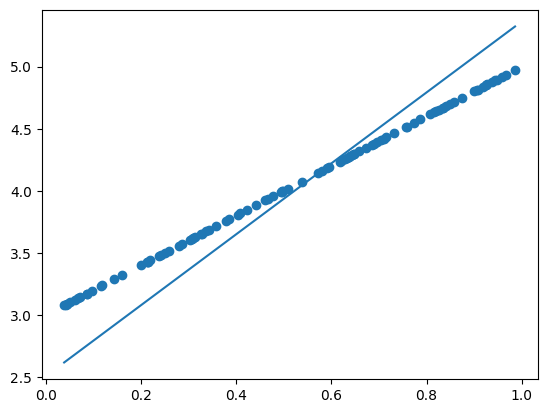

In [407]:
plot_2D(w, X_train, y_train)